<a href="https://colab.research.google.com/github/fmalate/ML-React-App-Template/blob/master/Portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
from pandas_datareader import data
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
plt.style.use('ggplot')

In [136]:
from pandas.util.testing import assert_frame_equal

In [137]:
import datetime
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta

In [138]:
start = dt.today() + relativedelta(years=-5)
end = dt.today()
tickers = ['HD', 'SPY', 'INTC', 'FB', 'AMD', 'TSLA', 'BABA', 'FB', 'T']
etf = ['VIG', 'NOBL', 'SDY', 'SCHD', 'IDV', 'DGRO', 'DON', 'FVD', 'SPHD']
df = data.DataReader(tickers, 'yahoo', start, end)['Adj Close']
etf_data = data.DataReader(etf, 'yahoo', start, end)['Adj Close']

In [139]:
df

Symbols,HD,SPY,INTC,FB,AMD,TSLA,BABA,T
Date,,,,,,,,
2015-08-07,104.209251,188.264404,25.424637,94.300003,2.090000,242.509995,78.820000,25.880342
2015-08-10,104.806358,190.636444,26.093708,94.150002,1.930000,241.139999,80.470001,26.311558
2015-08-11,104.886589,188.916321,25.503868,93.620003,1.900000,237.369995,77.339996,26.213213
2015-08-12,104.886589,189.142624,25.935240,94.190002,1.900000,238.169998,73.379997,25.736607
2015-08-13,106.071892,188.907227,25.415836,93.430000,1.790000,242.509995,75.110001,25.577742
...,...,...,...,...,...,...,...,...
2020-07-31,265.489990,326.519989,47.730000,253.669998,77.430000,1430.760010,251.020004,29.580000
2020-08-03,266.179993,328.790009,48.299999,251.960007,77.669998,1485.000000,257.940002,29.620001
2020-08-04,267.869995,330.059998,49.130001,249.830002,85.040001,1487.000000,262.200012,30.010000


In [140]:
etf_data

Symbols,VIG,NOBL,SDY,SCHD,IDV,DGRO,DON,FVD,SPHD
Date,,,,,,,,,
2015-08-07,71.920448,45.054646,63.205742,32.774876,23.896963,23.166143,24.176130,21.334869,26.721466
2015-08-10,72.624664,45.611862,63.878223,33.195290,24.200127,23.403925,24.505033,21.521936,26.900810
2015-08-11,72.046852,45.288311,63.550163,32.972221,23.859066,23.219372,24.365318,21.441769,26.843740
2015-08-12,72.055870,45.252361,63.624004,33.075188,23.881802,23.281483,24.417707,21.513033,27.023087
2015-08-13,71.974617,45.324268,63.599396,32.972221,23.768116,23.237123,24.382778,21.459581,26.998631
...,...,...,...,...,...,...,...,...,...
2020-07-31,123.010002,70.760002,93.559998,54.490002,25.400000,39.220001,29.410000,31.600000,33.599998
2020-08-03,123.730003,70.919998,93.839996,54.720001,25.650000,39.439999,29.590000,31.570000,33.570000
2020-08-04,124.309998,71.110001,94.209999,54.919998,25.900000,39.549999,29.700001,31.700001,33.910000


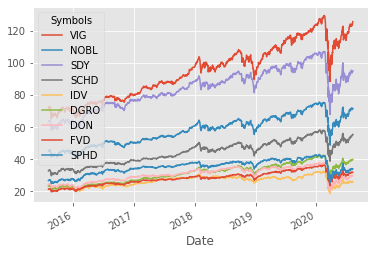

In [141]:
etf_data.plot()

In [142]:
pip install pyportfolioopt

In [143]:
#pypfopt is a library that implements portfolio optimization
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [144]:
#Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

In [145]:
#Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file('weights.csv') #saves csv file
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('HD', 0.10949), ('SPY', 0.0), ('INTC', 0.0), ('FB', 0.07947), ('AMD', 0.45154), ('TSLA', 0.20709), ('BABA', 0.15241), ('T', 0.0)])
Expected annual return: 62.8%
Annual volatility: 39.3%
Sharpe Ratio: 1.55


(0.6279291800110531, 0.39328992914121474, 1.5457532343595046)

In [146]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [147]:
weights = raw_weights

In [148]:
latest_prices = get_latest_prices(df)


da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 10000)
allocation, leftover = da.lp_portfolio()
print('Discrete allocation: ', allocation)
print('Funds remaining: ${:.2f} '.format(leftover))

Discrete allocation:  {'HD': 5.0, 'FB': 3.0, 'AMD': 53.0, 'TSLA': 1.0, 'BABA': 6.0}
Funds remaining: $178.02 


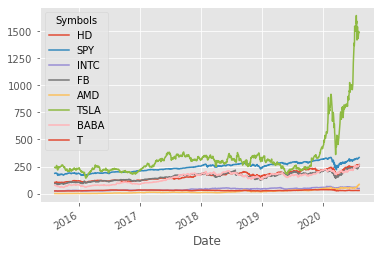

In [149]:
ax = df.plot()



In [150]:
#Calculate expected returns and sample covariance
mu1 = expected_returns.mean_historical_return(etf_data)
S1 = risk_models.sample_cov(etf_data)
mu1

Symbols
VIG     0.127760
NOBL    0.109957
SDY     0.100135
SCHD    0.122543
IDV     0.039532
DGRO    0.126985
DON     0.067231
FVD     0.096653
SPHD    0.068595
dtype: float64

In [151]:
S1

Symbols,VIG,NOBL,SDY,SCHD,IDV,DGRO,DON,FVD,SPHD
Symbols,,,,,,,,,
VIG,0.032101,0.032423,0.032876,0.032115,0.030940,0.033621,0.035945,0.030423,0.032222
NOBL,0.032423,0.034504,0.035214,0.033329,0.032527,0.034730,0.038560,0.032179,0.034934
SDY,0.032876,0.035214,0.037299,0.034193,0.033857,0.035724,0.041123,0.033846,0.037213
SCHD,0.032115,0.033329,0.034193,0.034307,0.032168,0.034626,0.037430,0.031469,0.034254
IDV,0.030940,0.032527,0.033857,0.032168,0.042833,0.034201,0.039415,0.031730,0.035104
DGRO,0.033621,0.034730,0.035724,0.034626,0.034201,0.036666,0.039685,0.032896,0.035682
DON,0.035945,0.038560,0.041123,0.037430,0.039415,0.039685,0.048638,0.037429,0.042070
FVD,0.030423,0.032179,0.033846,0.031469,0.031730,0.032896,0.037429,0.031831,0.034535
SPHD,0.032222,0.034934,0.037213,0.034254,0.035104,0.035682,0.042070,0.034535,0.040160


In [152]:
#Optimize for maximal Sharpe ratio for ETF
ef1 = EfficientFrontier(mu1, S1)
raw_weights = ef1.max_sharpe()
cleaned_weights = ef1.clean_weights()
ef.save_weights_to_file('etf_weights.csv') #saves csv file
print(cleaned_weights)
ef1.portfolio_performance(verbose=True)

OrderedDict([('VIG', 1.0), ('NOBL', 0.0), ('SDY', 0.0), ('SCHD', 0.0), ('IDV', 0.0), ('DGRO', 0.0), ('DON', 0.0), ('FVD', 0.0), ('SPHD', 0.0)])
Expected annual return: 12.8%
Annual volatility: 17.9%
Sharpe Ratio: 0.60


(0.12775889190343623, 0.1791673203123782, 0.6014427838489665)

In [155]:
latest_prices1 = get_latest_prices(etf_data)

latest_prices1

Symbols
VIG     125.559998
NOBL     71.540001
SDY      94.889999
SCHD     55.439999
IDV      26.110001
DGRO     39.830002
DON      29.900000
FVD      31.910000
SPHD     34.009998
Name: 2020-08-06 00:00:00, dtype: float64

In [156]:
da1 = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 10000)

In [157]:
allocation, leftover = da1.lp_portfolio()
print('Discrete allocation: ', allocation)
print('Funds remaining: ${:.2f} '.format(leftover))

ValueError: ignored